In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt 
from fenics import *
from dolfin import *
from mshr import *

<function matplotlib.pyplot.show(close=None, block=None)>

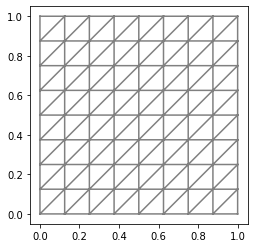

In [2]:
# Mesh type
square_mesh = UnitSquareMesh(8, 8)
plot(square_mesh)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

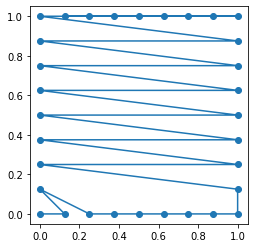

In [7]:
# Mesh type
square_mesh = UnitSquareMesh(8, 8)
boundary_mesh = BoundaryMesh(square_mesh, 'local')
plot(boundary_mesh)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

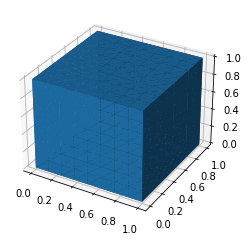

In [10]:
square_mesh = UnitCubeMesh(8, 8, 8)
plot(square_mesh)
plt.show

In [16]:
# Create mesh and define function space
mesh = UnitSquareMesh(32, 32)
V = FunctionSpace(mesh, "Lagrange", 1)

# Define Dirichlet boundary (x = 0 or x = 1)
def boundary(x):
    return x[0] < DOLFIN_EPS or x[0] > 1.0 - DOLFIN_EPS

# Define boundary condition
u0 = Constant(0.0)
bc = DirichletBC(V, u0, boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("10*exp(-(pow(x[0] - 0.5, 2) + pow(x[1] - 0.5, 2)) / 0.02)")
g = Expression("sin(5*x[0])")
a = inner(grad(u), grad(v))*dx
L = f*v*dx + g*v*ds

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Save solution in VTK format
file = File("poisson.pvd")
file << u

# Plot solution
plot(u, interactive=True)

KeyError: 'Must supply element or degree'

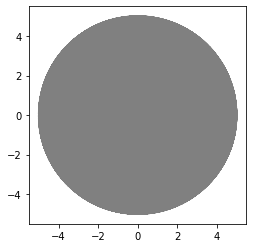

In [4]:
circle = Circle(Point(0, 0), 5)
mesh = generate_mesh(circle, 150)
plot(mesh)

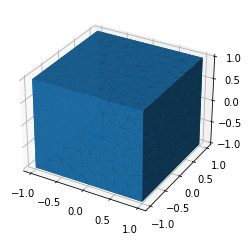

In [8]:
box = Box(Point(-1, -1, -1), Point(1, 1, 1))
mesh = generate_mesh(box, 16)
plot(mesh)

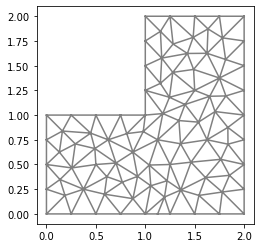

In [11]:
rectangle1 = Rectangle(Point(0, 0), Point(2, 1))
rectangle2 = Rectangle(Point(1, 1), Point(2, 2))
mesh = generate_mesh(rectangle1 + rectangle2, 8)
plot(mesh)

In [21]:
rectangle1 = Rectangle(Point(0, 0), Point(2, 1))
rectangle2 = Rectangle(Point(1, 1), Point(2, 2))
mesh = generate_mesh(rectangle1 + rectangle2, 8)

V = FunctionSpace(mesh, 'P', 1)

def boundary(x, on_boundary):
    return on_boundary
u_D = Expression('1 - 1*x[0]*x[0] + 2*x[1]*x[1]', degree=2)
bc = DirichletBC(V, u_D, boundary)

u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

u = Function(V)
solve(a == L, u, bc)

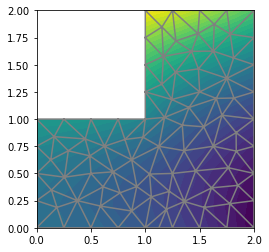

In [22]:
plot(u)
plot(mesh)
plt.show()

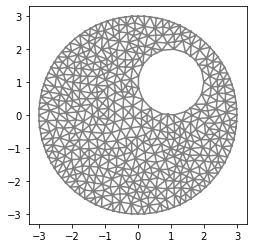

In [28]:
circle1 = Circle(Point(0, 0), 3)
circle2 = Circle(Point(1, 1), 1)
domain = circle1
domain.set_subdomain(1, circle2)
domain.set_subdomain(2, circle1 - circle2)
mesh = generate_mesh(domain, 16)

boundary_marker = MeshFunction(value_type='size_t', mesh=mesh, dim=2, mesh.domains())
boundary = MeshFunction(value_type='size_t', mesh=mesh, dim=1, mesh.domains())

for facet in facets(mesh):
    domains = []
    for cell in cells(facet):
        domains.append(boundary_marker[cell])
    
    domains = list(set(domains))
    

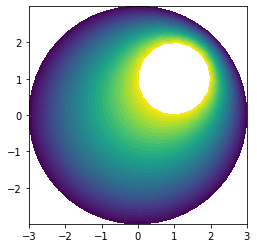

In [41]:
tol = 0.02

class Outer_circle(SubDomain):
    def inside(self, x, on_boundary):
        r = math.sqrt(x[0]*x[0]+x[1]*x[1])
        return near(r, 3, tol)

class Inner_circle(SubDomain):
    def inside(self, x, on_boundary):
        r = math.sqrt((x[0]-1)*(x[0]-1)+(x[1]-1)*(x[1]-1))
        return near(r, 1, tol)

outer_circle = Outer_circle()
inner_circle = Inner_circle()

circ_large = Circle(Point(0, 0), 3)
circ_small = Circle(Point(1, 1), 1)
domain = circ_large - circ_small
mesh = generate_mesh(domain, 16)

boundaries = MeshFunction('size_t', mesh, mesh.topology().dim()-1)
boundaries.set_all(0)
outer_circle.mark(boundaries, 1)
inner_circle.mark(boundaries, 2)

V = FunctionSpace(mesh, 'P', 1)
bc = []
bc.append(DirichletBC(V, Constant(0), boundaries, 1))
bc.append(DirichletBC(V, Constant(5), boundaries, 2))

u = TrialFunction(V)
v = TestFunction(V)
f = Constant(1.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

u = Function(V)
solve(a == L, u, bc)

plot(u)
# plot(mesh)
plt.show()

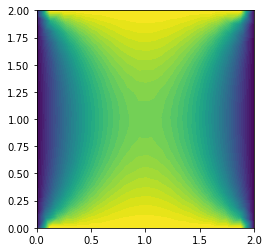

In [46]:
tol = 1e-2

class Top(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[1], 2, tol)

class Bottom(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[1], 0, tol)

class Left(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[0], 0, tol)

class Right(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[0], 2, tol)

top = Top()
bottom = Bottom()
left = Left()
right = Right()

domain = Rectangle(Point(0, 0), Point(2, 2))
mesh = generate_mesh(domain, 16)

boundaries = MeshFunction('size_t', mesh, mesh.topology().dim()-1)
boundaries.set_all(0)
top.mark(boundaries, 1)
bottom.mark(boundaries, 2)
left.mark(boundaries, 3)
right.mark(boundaries, 4)

V = FunctionSpace(mesh, 'P', 1)
bc = []
bc.append(DirichletBC(V, Constant(1), boundaries, 1))
bc.append(DirichletBC(V, Constant(1), boundaries, 2))
bc.append(DirichletBC(V, Constant(0), boundaries, 3))
bc.append(DirichletBC(V, Constant(0), boundaries, 4))

u = TrialFunction(V)
v = TestFunction(V)
f = Constant(1.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

u = Function(V)
solve(a == L, u, bc)

# plot(mesh)
plot(u)
plt.show()